<a href="https://colab.research.google.com/github/czhan244/MAT421/blob/main/Module_H_1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 22 Ordinary Differential Equation - Initial Value Problems**

22.1 ODE Initial Value Problem Statement

A differential equation -- a type of mathematical equation that explains how a function and its variations relate to one another. In other terms, it is an equation that uses a function's derivative.

An ordinary differential equation (ODE) -- a type of differential equation that involves only one independent variable and its derivatives. 

***

22.2 Reduction of Order

Reduction of order is a technique used to find a second solution to a homogeneous linear differential equation, given one known solution.

In [5]:
import sympy as sym

x = sym.symbols('x')
y = sym.Function('y')(x)

eqn = sym.diff(y, x, 2) + 4*sym.diff(y, x) + 4*y
known_sol = sym.exp(-4*x)
u = sym.Function('u')(x)
y2 = u * known_sol
dy2 = sym.diff(y2, x)
d2y2 = sym.diff(dy2, x)
eqn_sub = eqn.subs(y, y2).subs(sym.diff(y, x), dy2).subs(sym.diff(y, x, 2), d2y2)
eqn_sub = sym.simplify(eqn_sub/known_sol)
u_eqn = sym.Eq(sym.diff(u, x), 0)
u_sol = sym.dsolve(u_eqn)
y2_sol = y2.subs(u, u_sol.rhs)

print("Known solution: ", known_sol)
print("Second solution: ", y2_sol)


Known solution:  exp(-4*x)
Second solution:  C1*exp(-4*x)


***

22.3 The Euler Method

The Euler method -- a numerical method for approximating the solution of a first-order ordinary differential equation (ODE) with a given initial condition.

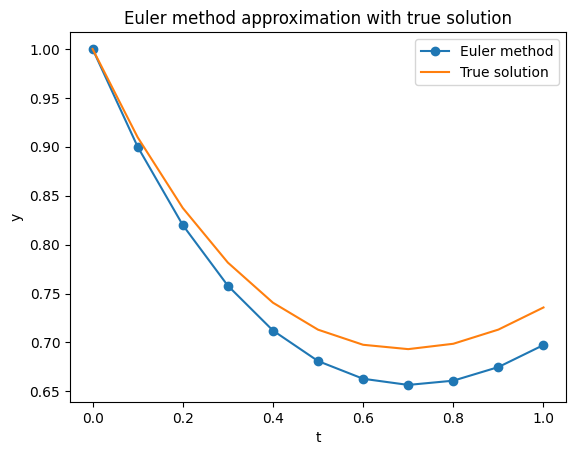

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return -y + t

def y_true(t):
    return t - 1 + 2 * np.exp(-t)

y0 = 1
h = 0.1
t_span = np.arange(0, 1 + h, h)
y_euler = np.zeros(len(t_span))
y_true = y_true(t_span)
y_euler[0] = y0
for i in range(len(t_span) - 1):
    y_euler[i+1] = y_euler[i] + h * f(t_span[i], y_euler[i])

plt.plot(t_span, y_euler, '-o', label='Euler method')
plt.plot(t_span, y_true, '-', label='True solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler method approximation with true solution')
plt.legend()
plt.show()

***

22.4 Numerical Error and Instability

***

22.5 Predictor-Corrector Methods

***

22.6 Python ODE Solvers